# -----------------------------------
##### User-Based Collaborative Filtering Recommendation System
# -----------------------------------
-  This code demonstrates a simple implementation of a User-Based Collaborative Filtering
- recommendation system. The system suggests movies to users based on the preferences
- of other users with similar taste. The system operates on two datasets:
   -  1. 'ratings.csv' - Contains movie ratings by different users.
   -   2. 'movies.csv' - Contains movie information, such as movie titles.

### Key Steps:
#### 1- load and Call used libraries
- 1. pandas: A powerful library for data manipulation and analysis, Used for working with structured data like data frames.
- 2. numpy A fundamental library for numerical computations in Python, It provides support for arrays and matrices, along with mathematical functions
- 3. Scipy tools are widely used for performing statistical analysis, for probability distributions, hypothesis testing, and descriptive statistics.
- 4. seaborn and matplot for visulization ,built on top of matplotlib
- 5. cosine_similarity: A function from scikit-learn that computes the cosine similarity between two vectors or matrices. Commonly used in recommendation systems to find similarities between users or items based on their attributes.
- 6.  csr_matrix:is used for efficient storage and computation, especially for large and sparse matrices where most elements are zero. It reduces memory usage and speeds up operations like cosine similarity.

In [1]:
# Data processing
import pandas as pd 
import numpy as np 
import scipy.stats
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#similarity
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

#### 2- Load and merge the datasets to create a unified data source linking user ratings with movie titles.

In [2]:
reating = pd.read_csv("C:\\Users\\zahra\\Downloads\\Telegram Desktop\\ratings.csv")
reating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
reating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
movies = pd.read_csv("C:\\Users\\zahra\\Downloads\\Telegram Desktop\\movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
unique_movies_ids = reating['movieId'].nunique()
# Print the result
print(f"Number of unique movies IDs: {unique_movies_ids}")

Number of unique movies IDs: 9724


In [7]:
unique_user_ids = reating['userId'].nunique()
# Print the result
print(f"Number of unique user IDs: {unique_user_ids}")

Number of unique user IDs: 610


In [8]:
df = pd.merge (reating, movies, on = 'movieId', how='inner')

#take a look at the data
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


#### 3- Create a user-item matrix where rows represent users, columns represent movie titles, and the values are the ratings given by users.

In [9]:
user_item_matrix = df.pivot_table(index='userId', columns='title', values='rating').fillna(0)
user_item_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


In [10]:
# Convert to sparse matrix for better performance
user_item_matrix_sparse = csr_matrix(user_item_matrix.values)

#### 4- Calculate user-user similarities using the cosine similarity metric, which measures the similarity between users based on their rating patterns.

In [11]:
#Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix_sparse)

# Store similarity in a DataFrame for ease of use
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_similarity_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


#### 5- Function to recommend movies based on similar users , This function identifies users who are most similar to the target user based on cosine similarity , It then recommends movies that similar users have highly rated but the target user has not yet rated.

In [12]:
# Optimized function for recommending movies based on similar users
def recommend_movies(user_id, user_item_matrix, user_similarity_df, num_recommendations=5, top_n_similar_users=100):
    # Get top N most similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).head(top_n_similar_users).index
    
    # Get ratings from similar users using vectorized operations
    similar_user_ratings = user_item_matrix.loc[similar_users]
    
    # Calculate the average rating across similar users
    weighted_ratings = similar_user_ratings.mean().sort_values(ascending=False)
    
    # Get movies already rated by the target user
    already_rated = user_item_matrix.loc[user_id]
    
    # Filter out movies the user has already rated
    recommendations = weighted_ratings[~already_rated.index.isin(already_rated[already_rated > 0].index)]
    
    # Convert to a DataFrame and reset index
    recommendations_df = pd.DataFrame(recommendations).reset_index()
    recommendations_df.columns = ['Movie Title', 'Predicted Rating']
    
    # Return the top N recommendations as a DataFrame
    return recommendations_df.head(num_recommendations)


##### 6- Output Format:
- The recommended_movies_df will now be a Pandas DataFrame with two columns:

- Movie Title: The title of the recommended movie.
- Predicted Rating: The predicted rating for that movie, based on the average rating from similar users.

In [13]:
# Example: Get movie recommendations for a specific user (replace 1 with a real user ID)
# Here we call the function to generate movie recommendations for user 1, returning the top 5 recommendations.
recommended_movies_df = recommend_movies(user_id=1, user_item_matrix=user_item_matrix, user_similarity_df=user_similarity_df)

# Print recommended movies as a DataFrame
print(recommended_movies_df)

                                         Movie Title  Predicted Rating
0  Star Wars: Episode V - The Empire Strikes Back...             4.100
1          Star Wars: Episode IV - A New Hope (1977)             4.095
2  Star Wars: Episode VI - Return of the Jedi (1983)             3.825
3                                 Matrix, The (1999)             3.705
4                                Pulp Fiction (1994)             3.570


#### 7- show plot a bar chart that displays the movie recommendations along with their predicted ratings.

- Use Matplotlib and Seaborn to create a bar chart.
- The x-axis will represent the movie titles, and the y-axis will represent the predicted ratings.

C:\Users\zahra\AppData\Local\Temp\ipykernel_4776\3587999441.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted Rating', y='Movie Title', data=recommended_movies_df, palette='viridis')


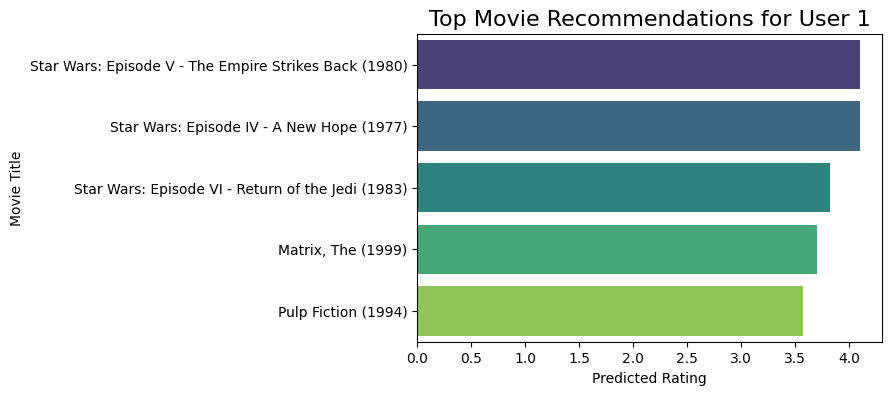

In [14]:
# Visualization: Bar chart of recommended movies
plt.figure(figsize=(6,4))
sns.barplot(x='Predicted Rating', y='Movie Title', data=recommended_movies_df, palette='viridis')

# Set titles and labels
plt.title('Top Movie Recommendations for User 1', fontsize=16)
plt.xlabel('Predicted Rating')
plt.ylabel('Movie Title')

# Display the plot
plt.show()